In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Open CSV and Convert to Dataframe
df = pd.read_csv('//Users/Daniel/Documents/Research Projects/Cosmic Filaments/GAMA_geos4.csv')

# Refine Dataframe to eliminate any galaxies that did not have 'distance to filament' values 
#df = df[(df.d.notnull()) & (df['logmstar'] > 0)]    ## THIS was for original FilGalsProps csv file 
df = df[(df.SurfaceDensity.notnull()) & (df['logmstar'] > 0) & (df.d.notnull())]
df

,CATAID,RA,DEC,Z,NQ,GeoS4,GeoS10,CATAID.1,nQ,Z_TONRY,...,N_SPEC,N_GAMA_SPEC,CATAID.3,X,Y,d,GroupID,BranchID,FilID,SurfaceDensity
3,14472,211.715826,0.639363,0.11432,4,2,2,14472.0,4.0,0.115302,...,1.0,1.0,14472.0,34.058370,336.222129,3.707450,0.0,1.500600e+09,150060.0,0.097
23,14505,211.888976,0.834380,0.10576,4,1,0,14505.0,4.0,0.106731,...,1.0,1.0,14505.0,30.637699,311.849568,4.009100,0.0,1.501370e+09,150137.0,0.187
24,14506,211.901176,0.728914,0.16509,4,2,2,14506.0,4.0,0.166113,...,1.0,1.0,14506.0,47.004539,479.490716,0.520299,302973.0,1.501490e+09,150149.0,0.561
31,14517,211.887465,0.630949,0.11350,5,2,2,14517.0,5.0,0.114478,...,2.0,0.0,14517.0,32.820478,333.976765,2.006810,0.0,1.500600e+09,150060.0,0.269
32,14518,211.892942,0.680866,0.17236,4,1,2,14518.0,4.0,0.173390,...,2.0,1.0,14518.0,49.061239,499.731338,3.131580,302974.0,1.502000e+09,150200.0,0.379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38813,740275,217.501820,-1.546969,0.16231,4,2,1,740275.0,4.0,0.163236,...,1.0,1.0,740275.0,-0.015046,473.596363,0.532618,306913.0,1.500330e+09,150033.0,0.130
38840,743295,217.775152,-1.027472,0.17881,4,2,2,743295.0,4.0,0.179743,...,2.0,2.0,743295.0,-2.496190,519.785728,1.999330,302751.0,1.500300e+09,150030.0,0.579
38857,744812,216.015875,-0.449460,0.15084,4,2,1,744812.0,4.0,0.151782,...,1.0,0.0,744812.0,11.436400,441.412163,1.791230,301349.0,1.501250e+09,150125.0,0.324
38890,746838,216.826139,-0.172962,0.16167,4,2,1,746838.0,4.0,0.162605,...,2.0,2.0,746838.0,5.551050,471.962584,1.667500,0.0,1.500330e+09,150033.0,3.700


In [10]:
# Assigning variables to columns of dataframe 2
logage = df['logage']
logmstar = df['logmstar']
gminusi = df['gminusi']
d = df['d']

In [3]:
logage

1069      9.84892
1077      9.77697
1080      9.80181
1081      9.75812
1082      9.49168
           ...   
110767    9.81439
110802    9.78807
110807    9.85412
110877    9.06462
110883    9.80933
Name: logage, Length: 10117, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x10df0dac0>,
 'caps': [<matplotlib.lines.Line2D at 0x10df2a0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10df0d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x10df2a640>],
 'fliers': [<matplotlib.lines.Line2D at 0x10df2a910>],
 'means': []}

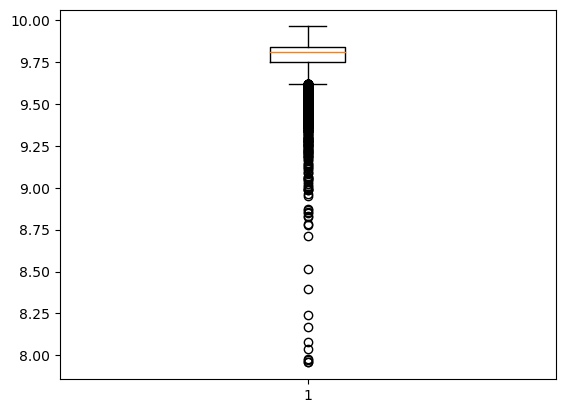

In [4]:
# Box Plot
plt.boxplot(logage)

In [13]:
# Function that returns upper and lower bound values
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [16,84])
 IQR = Q3 - Q1
 lower_range = Q1 - (2 * IQR)
 upper_range = Q3 + (2 * IQR)
 return lower_range,upper_range

In [14]:
# Get upper and lowerbound values 
lowerbound,upperbound = outlier_treatment(df.logage)

print(lowerbound)
print(upperbound)

9.4645384
10.113874399999998


In [15]:
# Check what values are considered outliers 
df[(df.logage < lowerbound) | (df.logage > upperbound)]

,CATAID,RA,DEC,Z,NQ,GeoS4,GeoS10,CATAID.1,nQ,Z_TONRY,...,N_SPEC,N_GAMA_SPEC,CATAID.3,X,Y,d,GroupID,BranchID,FilID,SurfaceDensity
343,14959,213.493144,0.763035,0.17532,4,1,2,14959.0,4.0,0.176324,...,1.0,1.0,14959.0,35.658181,509.060324,3.503120,0.0,1.500080e+09,150008.0,0.127
792,15673,216.442086,0.769001,0.13495,4,2,3,15673.0,4.0,0.135867,...,1.0,1.0,15673.0,7.321310,396.471396,3.351720,0.0,1.500040e+09,150004.0,0.191
875,15827,216.926448,0.630036,0.12661,4,2,3,15827.0,4.0,0.127512,...,1.0,1.0,15827.0,3.731835,372.784326,2.415400,300803.0,1.500050e+09,150005.0,2.939
1330,16611,219.464333,0.696411,0.13027,5,1,2,16611.0,5.0,0.131128,...,1.0,0.0,16611.0,-13.131156,382.860297,0.691645,303128.0,1.500050e+09,150005.0,0.917
1527,16962,221.128684,0.787843,0.17684,4,1,1,16962.0,4.0,0.177700,...,1.0,1.0,16962.0,-32.539916,513.107932,1.045180,0.0,1.500810e+09,150081.0,0.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38443,620025,222.828820,0.315498,0.17532,4,1,1,620025.0,4.0,0.176146,...,1.0,1.0,620025.0,-47.350438,507.645851,3.896180,307997.0,1.500740e+09,150074.0,0.339
38601,694503,219.267160,0.118091,0.14021,5,3,3,694503.0,5.0,0.141081,...,3.0,0.0,694503.0,-12.685180,411.155074,2.658670,0.0,1.500040e+09,150004.0,1.247
38709,718921,217.277389,1.285029,0.08647,3,2,2,718921.0,3.0,0.087332,...,1.0,0.0,718921.0,0.999920,257.358139,1.413050,304435.0,1.500070e+09,150007.0,0.229
38813,740275,217.501820,-1.546969,0.16231,4,2,1,740275.0,4.0,0.163236,...,1.0,1.0,740275.0,-0.015046,473.596363,0.532618,306913.0,1.500330e+09,150033.0,0.130


In [16]:
# Remove outliers from plot
df.drop(df[ (df.logage > upperbound) | (df.logage < lowerbound) ].index , inplace=True)

In [17]:
# NOW DO THE SAME FOR logmstar !! 
lowerbound,upperbound = outlier_treatment(df.logmstar)

print(lowerbound)
print(upperbound)

8.877699999999999
12.2612


In [18]:
# Check what values are considered outliers for logmstar
df[(df.logmstar < lowerbound) | (df.logmstar > upperbound)]

,CATAID,RA,DEC,Z,NQ,GeoS4,GeoS10,CATAID.1,nQ,Z_TONRY,...,N_SPEC,N_GAMA_SPEC,CATAID.3,X,Y,d,GroupID,BranchID,FilID,SurfaceDensity


In [19]:
# Remove outliers from plot
df.drop(df[ (df.logmstar > upperbound) | (df.logmstar < lowerbound) ].index , inplace=True)

In [20]:
df

,CATAID,RA,DEC,Z,NQ,GeoS4,GeoS10,CATAID.1,nQ,Z_TONRY,...,N_SPEC,N_GAMA_SPEC,CATAID.3,X,Y,d,GroupID,BranchID,FilID,SurfaceDensity
3,14472,211.715826,0.639363,0.11432,4,2,2,14472.0,4.0,0.115302,...,1.0,1.0,14472.0,34.058370,336.222129,3.707450,0.0,1.500600e+09,150060.0,0.097
23,14505,211.888976,0.834380,0.10576,4,1,0,14505.0,4.0,0.106731,...,1.0,1.0,14505.0,30.637699,311.849568,4.009100,0.0,1.501370e+09,150137.0,0.187
24,14506,211.901176,0.728914,0.16509,4,2,2,14506.0,4.0,0.166113,...,1.0,1.0,14506.0,47.004539,479.490716,0.520299,302973.0,1.501490e+09,150149.0,0.561
31,14517,211.887465,0.630949,0.11350,5,2,2,14517.0,5.0,0.114478,...,2.0,0.0,14517.0,32.820478,333.976765,2.006810,0.0,1.500600e+09,150060.0,0.269
32,14518,211.892942,0.680866,0.17236,4,1,2,14518.0,4.0,0.173390,...,2.0,1.0,14518.0,49.061239,499.731338,3.131580,302974.0,1.502000e+09,150200.0,0.379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38745,723729,220.598272,2.633615,0.13494,3,2,2,723729.0,3.0,0.135773,...,2.0,2.0,723729.0,-21.397288,395.310404,2.269140,0.0,1.500040e+09,150004.0,0.470
38798,739938,215.632243,-1.589480,0.15479,4,1,1,739938.0,4.0,0.155745,...,2.0,2.0,739938.0,14.750102,452.317421,0.084677,306871.0,1.500440e+09,150044.0,0.521
38840,743295,217.775152,-1.027472,0.17881,4,2,2,743295.0,4.0,0.179743,...,2.0,2.0,743295.0,-2.496190,519.785728,1.999330,302751.0,1.500300e+09,150030.0,0.579
38890,746838,216.826139,-0.172962,0.16167,4,2,1,746838.0,4.0,0.162605,...,2.0,2.0,746838.0,5.551050,471.962584,1.667500,0.0,1.500330e+09,150033.0,3.700


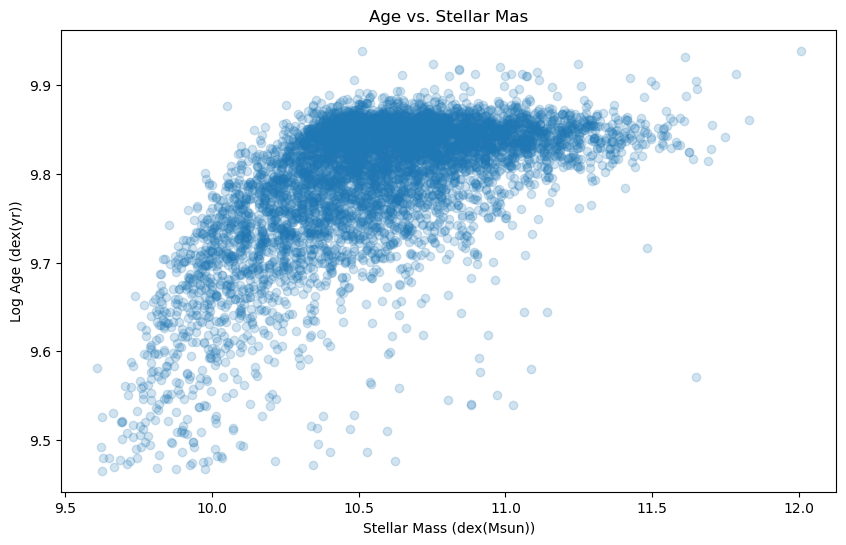

In [21]:
#Scatter Plot with whatever property you want to compare against distance to filament (x-axis)
x = df['d']

y = df['logage']
x2 = df['logmstar']


%matplotlib inline

plt.figure(figsize = (10,6))
plt.scatter(x2,y, alpha = 0.2)
#plt.title('Age vs. Distance to Closest Filament')
plt.title('Age vs. Stellar Mas')
#plt.xlabel('Distance to closest filament (Mpc/h)')
plt.xlabel('Stellar Mass (dex(Msun))')
plt.ylabel('Log Age (dex(yr))')

plt.show()

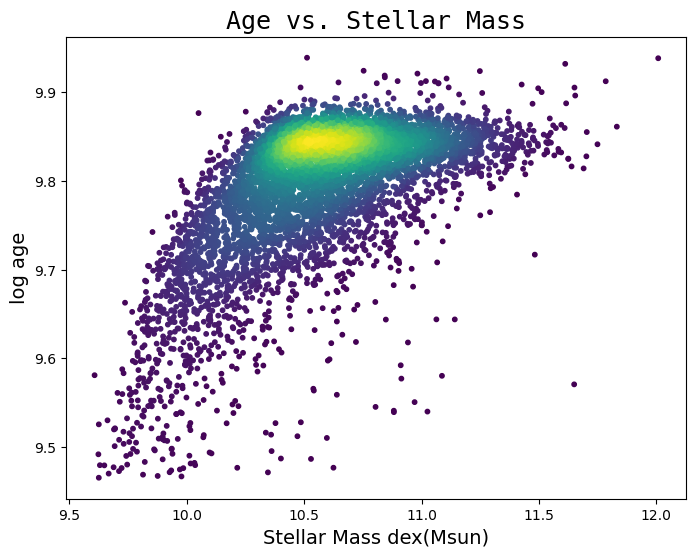

In [22]:
x = df['d']

y = df['logage']
x2 = df['logmstar']

# Calculate the point density
#xy = np.vstack([x,y])
xy = np.vstack([x2,y])
z = gaussian_kde(xy)(xy)


#fig, ax = plt.subplots()
plt.figure(figsize=(8,6))
plt.scatter(x2, y, c=z, s=10)
#plt.colorbar()
## plt.title('Age vs. Distance to Closest Filament', font = 'monospace', fontsize = 18)
plt.title('Age vs. Stellar Mass', font = 'monospace', fontsize = 18)
## plt.xlabel('Distance to closest filament (Mpc/h)', fontsize = 14)
plt.xlabel('Stellar Mass dex(Msun)', fontsize = 14)
plt.ylabel('log age', fontsize = 14)

plt.show()

In [23]:
### Saves new dataframe as csv file after removing outliers (so I don't have to do all that work each time)

#df.to_csv('GAMA_geos4_Refined.csv', index=False)

# df2 =  pd.read_csv('/Users/Daniel/Desktop/Research_Projects/NYCCT_Cosmic_Filaments/FilsGalsProperties_stats.csv')